In [161]:
import pandas as pd

In [162]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [163]:
dados = pd.read_json(url)

In [164]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [165]:
colunas = list(dados.columns)

In [166]:
colunas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [167]:
from pandas import json_normalize

In [168]:
# Ajustando as colunas aninhadas
dados_customer = json_normalize(dados['customer'])
dados_phone = json_normalize(dados['phone'])
dados_internet = json_normalize(dados['internet'])
dados_account = json_normalize(dados['account'])

In [169]:
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [170]:
dados_completos = pd.concat([dados['customerID'], dados['Churn'], dados_customer, dados_phone, dados_internet, dados_account], axis=1)

In [171]:
dados_completos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [172]:
#tipo dos dados
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [173]:
##Quantidade de linhas e colunas
dados_completos.shape

(7267, 21)

In [174]:
##Nome das colunas
dados_completos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [175]:
##Visualizar inconsistencias
dados_completos.Churn.unique()
for col in dados_completos.select_dtypes(include='object').columns:
  print(f'Valores únicos na coluna {col}:')
  print(dados_completos[col].unique())
  print("-" * 30)

Valores únicos na coluna customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Valores únicos na coluna Churn:
['No' 'Yes' '']
------------------------------
Valores únicos na coluna gender:
['Female' 'Male']
------------------------------
Valores únicos na coluna Partner:
['Yes' 'No']
------------------------------
Valores únicos na coluna Dependents:
['Yes' 'No']
------------------------------
Valores únicos na coluna PhoneService:
['Yes' 'No']
------------------------------
Valores únicos na coluna MultipleLines:
['No' 'Yes' 'No phone service']
------------------------------
Valores únicos na coluna InternetService:
['DSL' 'Fiber optic' 'No']
------------------------------
Valores únicos na coluna OnlineSecurity:
['No' 'Yes' 'No internet service']
------------------------------
Valores únicos na coluna OnlineBackup:
['Yes' 'No' 'No internet service']
------------------------------
Valores únicos na coluna Devi

In [176]:
dados_completos.Churn.unique()
for col in dados_completos.select_dtypes(include='int64').columns:
  print(f'Valores únicos na coluna {col}:')
  print(dados_completos[col].unique())
  print("-" * 30)

Valores únicos na coluna SeniorCitizen:
[0 1]
------------------------------
Valores únicos na coluna tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------


In [177]:
dados_completos.Churn.unique()
for col in dados_completos.select_dtypes(include='float64').columns:
  print(f'Valores únicos na coluna {col}:')
  print(dados_completos[col].unique())
  print("-" * 30)

Valores únicos na coluna Charges.Monthly:
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
------------------------------


In [178]:
# verificando dados nulos
dados_completos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [179]:
dados_completos.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [180]:
dados_completos['Charges.Total'] = pd.to_numeric(dados_completos['Charges.Total'], errors='coerce')

In [181]:
contar_dadosNulos_chargesTotal = dados_completos['Charges.Total'].isnull().sum()
contar_dadosNulos_chargesTotal

np.int64(11)

In [182]:
# Contar a quantidade de strings vazias na coluna 'Churn'
quantidade_churn_vazio = (dados_completos['Churn'] == '').sum()
quantidade_churn_vazio

np.int64(224)

In [183]:
# Remover linhas onde 'Churn' é uma string vazia
dados_completos = dados_completos[dados_completos['Churn'] != '']

# Remover linhas onde 'Charges.Total' é NaN
dados_completos = dados_completos.dropna(subset=['Charges.Total'])

# Verificar o número de linhas restantes no DataFrame
print(f"Número de linhas após remover inconsistências: {dados_completos.shape[0]}")

Número de linhas após remover inconsistências: 7032


In [184]:
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [185]:
dados_completos['Charges.Total'] = dados_completos['Charges.Total'].astype(np.float64)

In [186]:
# Remover linhas onde 'Charges.Total' é uma string vazia ' '
dados_completos = dados_completos[dados_completos['Charges.Total'] != ' ']

In [187]:
#converter a coluna 'Charges.Total' para float
dados_completos['Charges.Total'] = dados_completos['Charges.Total'].astype(float)


In [188]:
# Verificar o tipo de dado da coluna 'Charges.Total' após a conversão
print(dados_completos['Charges.Total'].dtype)

float64


In [189]:
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [190]:
dados_completos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [191]:
#estimativa contas diárias (divisão por 30d)
dados_completos['Contas_Diarias_estimado'] = round(dados_completos['Charges.Total'] / 30, 1)

In [192]:
#estimativa contas diárias utilizando a coluna 'tenure'
dados_completos['Contas_Diarias_preciso'] = np.where(dados_completos['tenure'] > 0, round((dados_completos['Charges.Total'] / dados_completos['tenure']) / 30.44, 1), 0)

In [193]:
dados_completos[['Charges.Total', 'tenure', 'Contas_Diarias_estimado', 'Contas_Diarias_preciso']].head()

,Charges.Total,tenure,Contas_Diarias_estimado,Contas_Diarias_preciso
0,593.30,9,19.8,2.2
1,542.40,9,18.1,2.0
2,280.85,4,9.4,2.3
3,1237.85,13,41.3,3.1
4,267.40,3,8.9,2.9


In [194]:
dados_completos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias_estimado,Contas_Diarias_preciso
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.8,2.2
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.1,2.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.4,2.3
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.3,3.1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.9,2.9


In [196]:
# 1. Estatísticas descritivas gerais para colunas numéricas
print("Estatísticas Descritivas Gerais:")
display(dados_completos.describe())

# 2. Estatísticas descritivas por Churn
print("\nEstatísticas Descritivas por Churn:")
display(dados_completos.groupby('Churn').describe().T)

Estatísticas Descritivas Gerais:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias_estimado,Contas_Diarias_preciso
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,76.109869,2.128427
std,0.368844,24.545260,30.085974,2266.771362,75.558967,0.992523
min,0.000000,1.000000,18.250000,18.800000,0.600000,0.500000
25%,0.000000,9.000000,35.587500,401.450000,13.400000,1.200000
50%,0.000000,29.000000,70.350000,1397.475000,46.600000,2.300000
75%,0.000000,55.000000,89.862500,3794.737500,126.500000,3.000000
max,1.000000,72.000000,118.750000,8684.800000,289.500000,4.000000



Estatísticas Descritivas por Churn:


Churn                                   No          Yes
SeniorCitizen           count  5163.000000  1869.000000
                        mean      0.128995     0.254682
                        std       0.335227     0.435799
                        min       0.000000     0.000000
                        25%       0.000000     0.000000
                        50%       0.000000     0.000000
                        75%       0.000000     1.000000
                        max       1.000000     1.000000
tenure                  count  5163.000000  1869.000000
                        mean     37.650010    17.979133
                        std      24.076940    19.531123
                        min       1.000000     1.000000
                        25%      15.000000     2.000000
                        50%      38.000000    10.000000
                        75%      61.000000    29.000000
                        max      72.000000    72.000000
Charges.Monthly         count  5163.000000  1869.000000
                        mean     61.307408    74.441332
                        std      31.094557    24.666053
                        min      18.250000    18.850000
                        25%      25.100000    56.150000
                        50%      64.450000    79.650000
                        75%      88.475000    94.200000
                        max     118.750000   118.350000
Charges.Total           count  5163.000000  1869.000000
                        mean   2555.344141  1531.796094
                        std    2329.456984  1890.822994
                        min      18.800000    18.850000
                        25%     577.825000   134.500000
                        50%    1683.600000   703.550000
                        75%    4264.125000  2331.300000
                        max    8672.450000  8684.800000
Contas_Diarias_estimado count  5163.000000  1869.000000
                        mean     85.178094    51.059444
                        std      77.648590    63.026847
                        min       0.600000     0.600000
                        25%      19.250000     4.500000
                        50%      56.100000    23.500000
                        75%     142.100000    77.700000
                        max     289.100000   289.500000
Contas_Diarias_preciso  count  5163.000000  1869.000000
                        mean      2.013713     2.445318
                        std       1.024318     0.819500
                        min       0.500000     0.500000
                        25%       0.800000     1.900000
                        50%       2.100000     2.600000
                        75%       2.900000     3.100000
                        max       4.000000     4.000000

In [197]:
#quantidade de clientes, segundo categoria Churn
quantidade_churn = dados_completos['Churn'].value_counts()

In [198]:
#percentual
percentual_churn = dados_completos['Churn'].value_counts(normalize=True) * 100

In [200]:
quantidade_churn

,count
Churn,
No,5163
Yes,1869


In [204]:
percentual = round(percentual_churn, 1)
percentual

,proportion
Churn,
No,73.4
Yes,26.6


In [202]:
import matplotlib.pyplot as plt

In [206]:
import seaborn as sns

/tmp/ipython-input-213-4014727284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentual_churn.index, y=percentual_churn.values, palette='viridis')


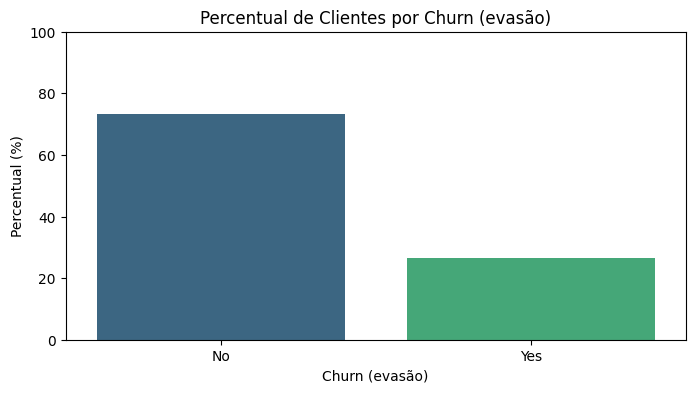

In [213]:
plt.figure(figsize=(8,4))
sns.barplot(x=percentual_churn.index, y=percentual_churn.values, palette='viridis')
plt.title('Percentual de Clientes por Churn (evasão)')
plt.xlabel('Churn (evasão)')
plt.ylabel('Percentual (%)')
plt.ylim(0,100)

plt.show()

In [215]:
#evasão por genero
percentual_genero = round(dados_completos.groupby('gender')['Churn'].value_counts(normalize=True) * 100, 1)

In [217]:
percentual_genero_ajustado = percentual_genero.reset_index()

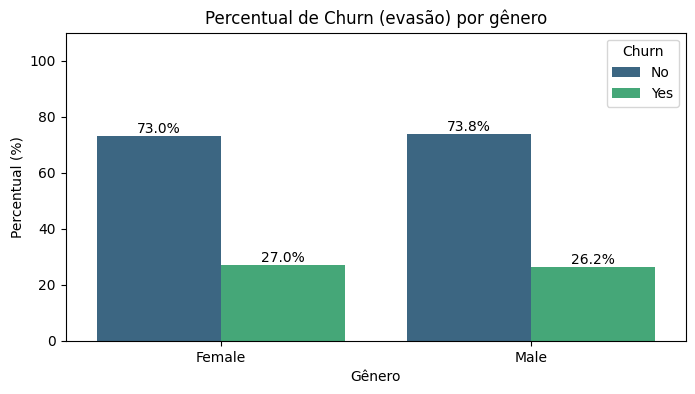

In [224]:
plt.figure(figsize=(8,4))
ax = sns.barplot(percentual_genero_ajustado, x=percentual_genero_ajustado['gender'], y=percentual_genero_ajustado['proportion'], hue=percentual_genero_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por gênero')
plt.xlabel('Gênero')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

In [226]:
#evasão por tipo de contrato
percentual_tipo_contrato = round(dados_completos.groupby('Contract')['Churn'].value_counts(normalize=True) * 100, 1)

In [227]:
percentual_tipo_contrato_ajustado = percentual_tipo_contrato.reset_index()

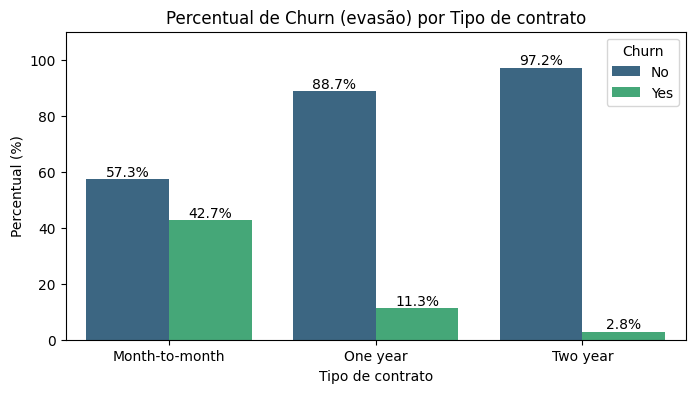

In [228]:
plt.figure(figsize=(8,4))
ax = sns.barplot(percentual_tipo_contrato_ajustado, x=percentual_tipo_contrato_ajustado['Contract'], y=percentual_tipo_contrato_ajustado['proportion'], hue=percentual_tipo_contrato_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por Tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

In [229]:
#evasão por método de pagamento
percentual_metodo_pag = round(dados_completos.groupby('PaymentMethod')['Churn'].value_counts(normalize=True) * 100, 1)

In [230]:
percentual_metodo_pag_ajustado = percentual_metodo_pag.reset_index()

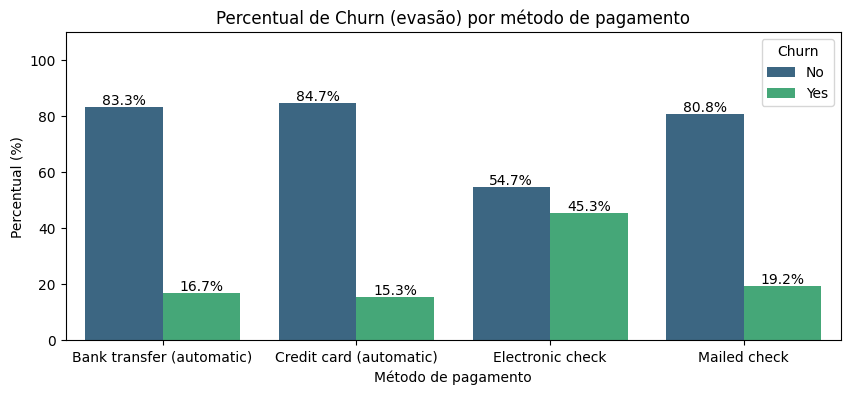

In [232]:
plt.figure(figsize=(10,4))
ax = sns.barplot(percentual_metodo_pag_ajustado, x=percentual_metodo_pag_ajustado['PaymentMethod'], y=percentual_metodo_pag_ajustado['proportion'], hue=percentual_metodo_pag_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por método de pagamento')
plt.xlabel('Método de pagamento')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

In [233]:
#evasão por tempo de contrato
percentual_tempo_contrato = round(dados_completos.groupby('tenure')['Churn'].value_counts(normalize=True) * 100, 1)

In [234]:
percentual_tempo_contrato_ajustado = percentual_tempo_contrato.reset_index()

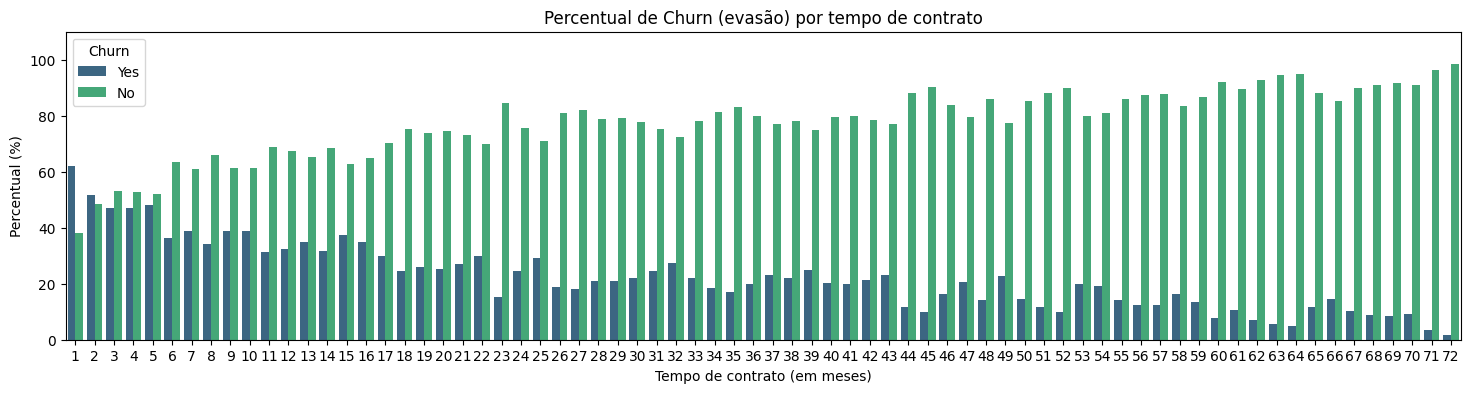

In [238]:
plt.figure(figsize=(18,4))
ax = sns.barplot(percentual_tempo_contrato_ajustado, x=percentual_tempo_contrato_ajustado['tenure'], y=percentual_tempo_contrato_ajustado['proportion'], hue=percentual_tempo_contrato_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por tempo de contrato')
plt.xlabel('Tempo de contrato (em meses)')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

In [239]:
#nova coluna para tempo de contrato em anos
dados_completos['tempo_contrato_ano'] = pd.cut(dados_completos['tenure'], bins=[0,12,24,36,48,60,72], labels=['0-1 ano', '1-2 anos','2-3 anos', '3-4 anos', '4-5 anos', '5-6 anos'])

In [240]:
#percentual de Churn por tempo de contrato em anos
percentual_tempo_contrato_ano = round(dados_completos.groupby('tempo_contrato_ano')['Churn'].value_counts(normalize=True) * 100, 1)

/tmp/ipython-input-240-716145696.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentual_tempo_contrato_ano = round(dados_completos.groupby('tempo_contrato_ano')['Churn'].value_counts(normalize=True) * 100, 1)


In [241]:
#dados para o gráfico (transformar a Series MultiIndex em DataFrame)
percentual_tempo_contrato_ano_ajustado = percentual_tempo_contrato_ano.reset_index()

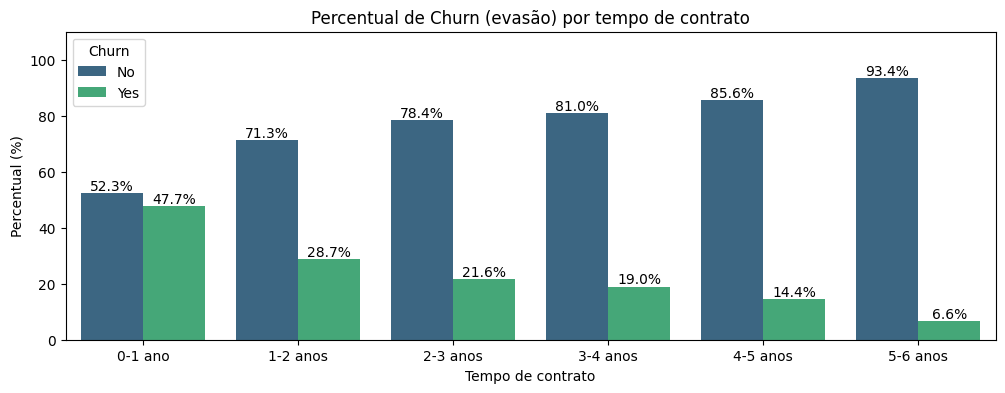

In [244]:
plt.figure(figsize=(12,4))
ax = sns.barplot(percentual_tempo_contrato_ano_ajustado, x=percentual_tempo_contrato_ano_ajustado['tempo_contrato_ano'], y=percentual_tempo_contrato_ano_ajustado['proportion'], hue=percentual_tempo_contrato_ano_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por tempo de contrato')
plt.xlabel('Tempo de contrato')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

In [248]:
#nova coluna para gasto total do cliente em faixas
dados_completos['gasto_total_cliente'] = pd.cut(dados_completos['Charges.Total'], bins=[0,3000,6000,9000], labels=['0-3.000', '3.000-6.000', '6.000-9.000'])

In [249]:
#percentual de Churn por gasto total do cliente
percentual_gasto_total = round(dados_completos.groupby('gasto_total_cliente')['Churn'].value_counts(normalize=True) * 100, 1)

/tmp/ipython-input-249-1616591185.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentual_gasto_total = round(dados_completos.groupby('gasto_total_cliente')['Churn'].value_counts(normalize=True) * 100, 1)


In [250]:
percentual_gasto_total_ajustado = percentual_gasto_total.reset_index()

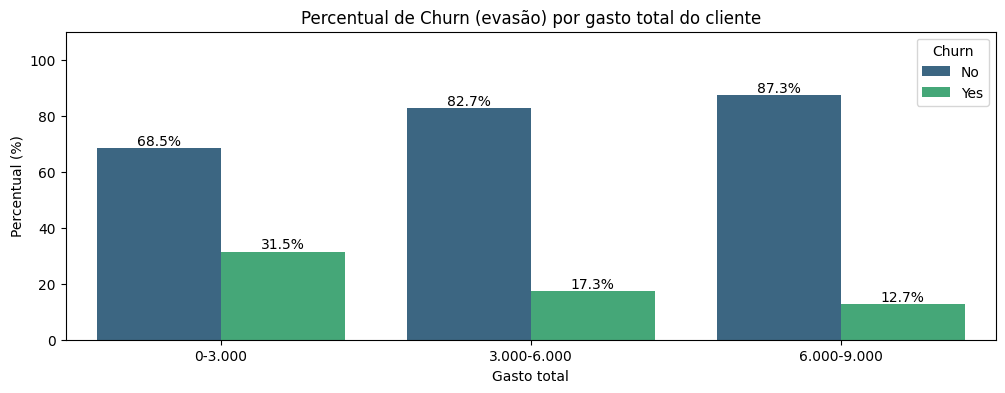

In [252]:
plt.figure(figsize=(12,4))
ax = sns.barplot(percentual_gasto_total_ajustado, x=percentual_gasto_total_ajustado['gasto_total_cliente'], y=percentual_gasto_total_ajustado['proportion'], hue=percentual_gasto_total_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por gasto total do cliente')
plt.xlabel('Gasto total')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

# Relatório Telecom X - Análise de Evasão de Clientes

## 1. Introdução

*   A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.
*   A fonte dos dados utilizada para as análises a seguir foi um arquivo no formato JSON da API da Telecom X. Os dados contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado, status de evasão dentre outros.

## 2. Limpeza e Tratamento de Dados

*   Para importar os dados utilizei a biblioteca pandas do python com a função read_json.
*   Após importação e visualização da estrutura dos dados, verifiquei a necessidade de normalizar as colunas (customer, phone, internet, account) através do método json_normalize da biblioteca pandas.
*   Após isso iniciei o processo de verificação dos dados em busca de possíveis inconsistências com a função unique para dados únicos e após isso encontrei dados em branco ou vazios (ex: strings vazias em Churn, valores não numéricos em Charges.Total).
*   As linhas que foram encontradas vazias foram removidas das colunas 'Churn' e 'Charges.Total'.
*   Somente então pude converter tipo de dados (por exemplo, a coluna Charges.Total em tipo float), também houve necessidade de criação de novas colunas como 'tempo_contrato_ano' e 'gasto_total_cliente' a fim de melhorar a análise dos dados.

## 3. Análise Exploratória de Dados (AED)

*   **Estatísticas Descritivas:** As estatísticas descritivas para as colunas numéricas (`tenure`, `Charges.Monthly`, `Charges.Total`, `SeniorCitizen`, `Contas_Diarias_estimado`, `Contas_Diarias_preciso`) revelam a distribuição desses dados. Por exemplo, observamos a média e a mediana do tempo de contrato, dos gastos mensais e totais, e a proporção de clientes idosos.

*   **Distribuição Geral do Churn:** A análise da coluna 'Churn' mostrou que aproximadamente 26.6% dos clientes na base de dados deram Churn. Isso indica uma taxa de evasão significativa.

*   **Churn por Gênero:** A análise da evasão por gênero revelou que os percentuais de Churn para clientes do sexo masculino (**26.2%**) e feminino (**27.0%**) são muito próximos. Isso sugere que o gênero, por si só, não é um fator altamente discriminatório para a evasão de clientes nesta base de dados.

*   **Churn por Tipo de Contrato:** A análise do Churn por tipo de contrato (`Contract`) destacou uma diferença significativa na taxa de evasão. Clientes com contratos **Mês a Mês** apresentam um percentual de Churn consideravelmente maior (**42.7%**) em comparação com contratos de **Um Ano** (**11.3%**) e **Dois Anos** (**2.8%**). Contratos de maior duração parecem estar associados a uma menor probabilidade de evasão e mostra os clientes "fiéis".

*   **Churn por Método de Pagamento:** A análise da evasão por método de pagamento (`PaymentMethod`) indicou que clientes que utilizam **Cheque Eletrônico** apresentam uma taxa de Churn muito mais alta (**45.3%**) em comparação com outros métodos de pagamento, como Transferência Bancária Automática (**16.7%**), Cartão de Crédito Automático (**15.3%**), e Cheque Enviado por Correio (**19.2%**). O método de pagamento eletrônico parece ser um indicador importante de clientes propensos a sair.

*   **Churn por Tempo de Contrato (em anos):** A análise da evasão utilizando a coluna agrupada 'tempo\_contrato\_ano' demonstrou que clientes com **menos tempo de contrato** apresentam um percentual de Churn significativamente mais alto. O grupo de clientes com **0-1 ano** de contrato tem a maior taxa de evasão (**47.7%**), e essa taxa tende a diminuir drasticamente à medida que o tempo de contrato aumenta. Clientes com **5-6 anos** de contrato têm uma taxa de Churn muito baixa (**6.6%**). Isso reforça a ideia de que a lealdade do cliente aumenta com o tempo.
    
*   **Churn por Faixa de Gasto Total:** A análise da evasão por faixas de gasto total ('gasto\_total\_cliente') mostrou que clientes com **gasto total menor** tendem a ter um percentual de Churn mais alto. O grupo com **0-3.000** de gasto total apresenta a maior taxa de evasão (**31.5%**), e a taxa de Churn diminui para os grupos com gasto total entre **3.000-6.000** (**17.3%**) e **6.000-9.000** (**12.7%**). Clientes que gastaram mais no total parecem ser menos propensos a sair.

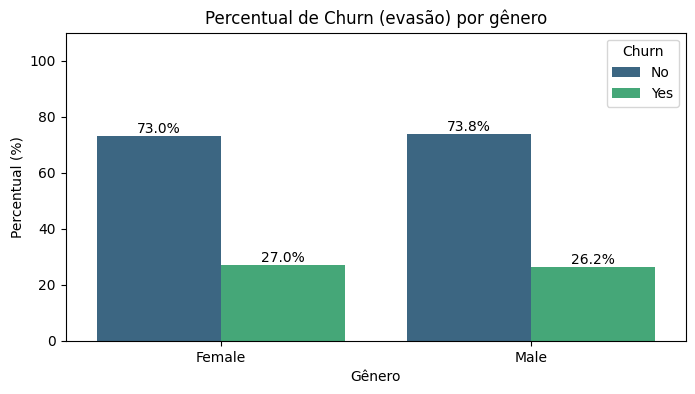

In [258]:
# Código do gráfico de Percentual de Churn por Gênero (da célula gSqoLIKH_VKy)
plt.figure(figsize=(8,4))
ax = sns.barplot(percentual_genero_ajustado, x=percentual_genero_ajustado['gender'], y=percentual_genero_ajustado['proportion'], hue=percentual_genero_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por gênero')
plt.xlabel('Gênero')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

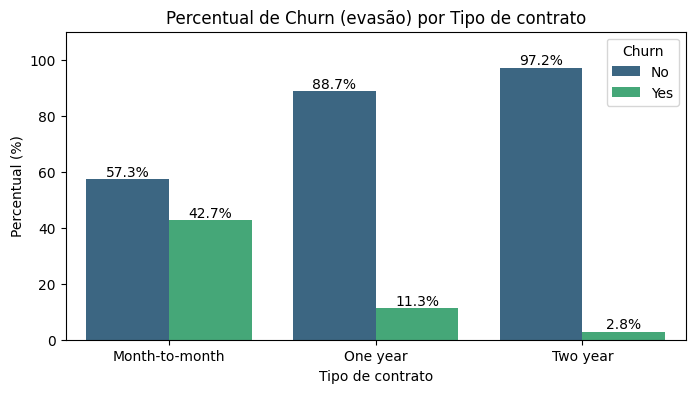

In [259]:
# Código do gráfico de Percentual de Churn por Tipo de Contrato (da célula WzF23FUUCyox)
plt.figure(figsize=(8,4))
ax = sns.barplot(percentual_tipo_contrato_ajustado, x=percentual_tipo_contrato_ajustado['Contract'], y=percentual_tipo_contrato_ajustado['proportion'], hue=percentual_tipo_contrato_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por Tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

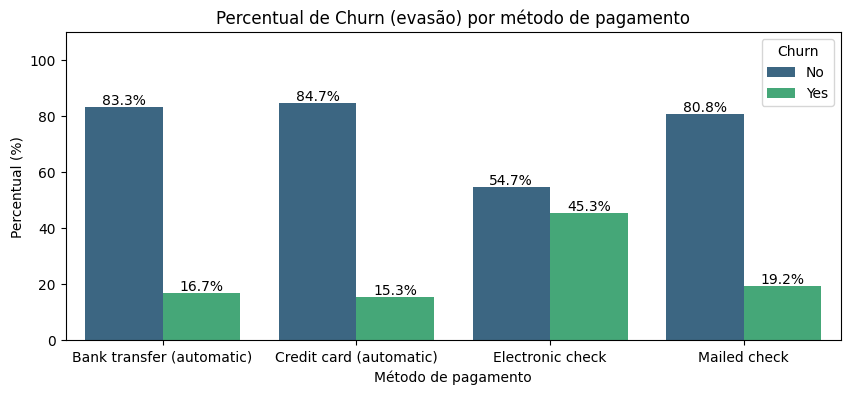

In [260]:
# Código do gráfico de Percentual de Churn por Método de Pagamento (da célula 5h_KpHELDaHx)
plt.figure(figsize=(10,4))
ax = sns.barplot(percentual_metodo_pag_ajustado, x=percentual_metodo_pag_ajustado['PaymentMethod'], y=percentual_metodo_pag_ajustado['proportion'], hue=percentual_metodo_pag_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por método de pagamento')
plt.xlabel('Método de pagamento')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

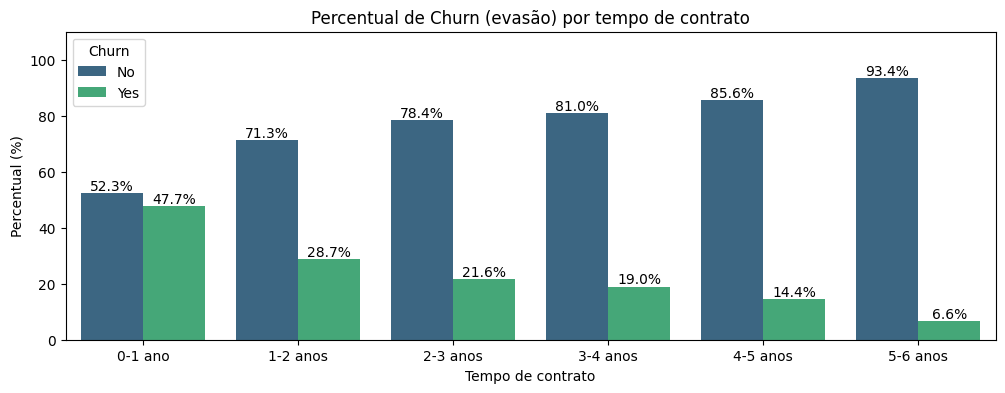

In [261]:
# Código do gráfico de Percentual de Churn por Tempo de Contrato (em anos) (da célula amgOZwW_HN9a)
plt.figure(figsize=(12,4))
ax = sns.barplot(percentual_tempo_contrato_ano_ajustado, x=percentual_tempo_contrato_ano_ajustado['tempo_contrato_ano'], y=percentual_tempo_contrato_ano_ajustado['proportion'], hue=percentual_tempo_contrato_ano_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por tempo de contrato')
plt.xlabel('Tempo de contrato')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

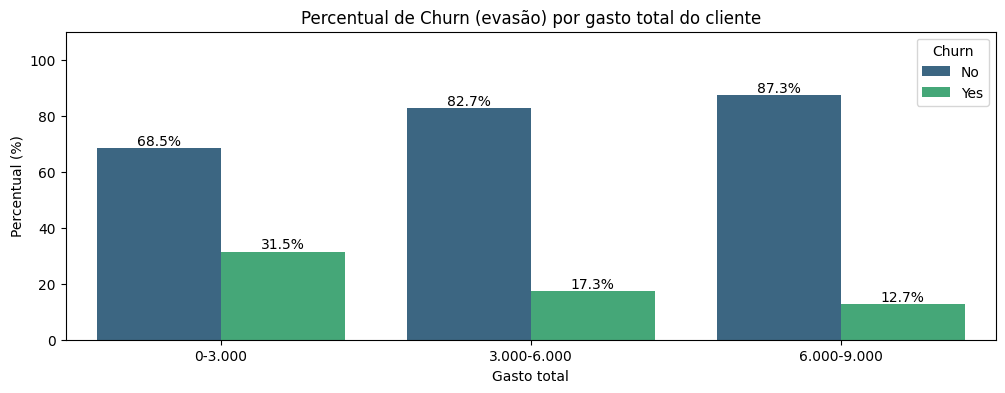

In [262]:
# Código do gráfico de Percentual de Churn por Faixa de Gasto Total (da célula dLSdV6UTKwT2)
plt.figure(figsize=(12,4))
ax = sns.barplot(percentual_gasto_total_ajustado, x=percentual_gasto_total_ajustado['gasto_total_cliente'], y=percentual_gasto_total_ajustado['proportion'], hue=percentual_gasto_total_ajustado['Churn'], palette='viridis')
plt.title('Percentual de Churn (evasão) por gasto total do cliente')
plt.xlabel('Gasto total')
plt.ylabel('Percentual (%)')
plt.ylim(0,110) # Aumentar o limite Y para dar espaço aos rótulos

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

## 4. Conclusões e Insights

Com base na análise exploratória, podemos tirar as seguintes conclusões sobre a evasão de clientes na TelecomX:

*   **Fatores Críticos de Churn:** As variáveis que mostraram maior relação com a evasão foram o **Tipo de Contrato** (clientes Mês a Mês), o **Método de Pagamento** (especialmente Cheque Eletrônico), o **Tempo de Contrato** (clientes com menos tempo são mais propensos a sair), e a **Faixa de Gasto Total** (clientes com menor gasto total). O gênero parece não ser um fator discriminatório significativo.

*   **Perfil do Cliente com Maior Risco de Evasão:** Clientes com maior probabilidade de dar Churn tendem a ter **contratos de Mês a Mês**, utilizar **Cheque Eletrônico** como método de pagamento, estar na **fase inicial** do seu relacionamento com a empresa (menos tempo de contrato), e ter um **gasto total acumulado menor**.

*   **Entendendo o "Porquê":**
    *   A alta evasão em contratos Mês a Mês sugere que esses clientes têm maior flexibilidade para sair e talvez menos "compromisso" com a empresa. Pode indicar insatisfação contínua ou simplesmente a natureza de um contrato de curto prazo.
    *   A associação com Cheque Eletrônico pode estar ligada à demografia desses clientes ou a possíveis problemas na experiência de pagamento digital.
    *   A alta evasão inicial reforça a importância dos primeiros meses de relacionamento do cliente. A experiência inicial, o onboarding e a percepção de valor no começo são cruciais.
    *   Clientes com menor gasto total podem ser aqueles que utilizam menos serviços, percebem menos valor, ou talvez estejam tendo problemas que os impedem de usar mais (e eventualmente os levam a sair).

## 5. Recomendações

Com base na análise, as seguintes recomendações podem ser consideradas pela TelecomX para reduzir a evasão de clientes:

*   **Foco em Clientes Mês a Mês:** Desenvolver estratégias específicas para reter clientes com contrato Mês a Mês. Isso pode incluir:
    *   Oferecer incentivos para migrar para contratos de maior duração (descontos, benefícios adicionais).
    *   Monitorar ativamente a satisfação e o uso desses clientes.
    *   Programas de fidelidade que recompensem o tempo de permanência, mesmo sem contrato de longo prazo.

*   **Melhorar a Experiência de Pagamento Eletrônico:** Investigar os motivos da alta evasão entre usuários de Cheque Eletrônico. Isso pode envolver:
    *   Simplificar o processo de pagamento eletrônico.
    *   Garantir a confiabilidade e segurança das transações.
    *   Oferecer suporte proativo a clientes que utilizam este método.
    *   Incentivar a adoção de métodos de pagamento automáticos (cartão de crédito, transferência bancária), que mostraram menor Churn.

*   **Estratégias para Novos Clientes:** Implementar ações para engajar e reter clientes nos primeiros 12 meses:
    *   Programa de Boas-Vindas robusto e acompanhamento nos primeiros meses.
    *   Garantir que os clientes entendam e utilizem plenamente os serviços contratados.
    *   Pesquisas de satisfação proativas no início do contrato.

*   **Programas para Clientes de Baixo Gasto Total:** Analisar o comportamento e as necessidades de clientes com menor gasto total para entender se há oportunidades de aumentar o uso dos serviços ou resolver problemas que limitem o uso.

*   **Próximos Passos Sugeridos:**
    *   Construir um modelo preditivo de Churn para identificar clientes de alto risco *antes* que eles saiam.
    *   Realizar pesquisas qualitativas com clientes que deram Churn para entender as razões em mais profundidade.
    *   Analisar a relação do Churn com outras variáveis (serviços de internet, suporte técnico, etc.) que não foram o foco principal desta análise inicial